<div align="center">
</div>

<h1 align="center">Bike-Rental-Prediction-Analysis</h1>

<div align="center">

---

</div>

<div align="right">
<b>Author: Gangasrinivas Katraji</b><br>
<a href="mailto:author@example.com">gangasrinivas27@gmail.com</a>
</div>

### Introduction to the Dataset

Bike sharing systems have revolutionized traditional bike rentals by automating the entire process. Users can now rent bikes from one location and return them to another, promoting sustainable urban transportation. With over 500 programs worldwide and more than 500,000 bicycles, these systems offer practical solutions and generate valuable data.

Unlike other public transport, bike sharing records detailed trip data, such as duration and start/end locations. This data is crucial for understanding urban mobility and identifying important city events.

The dataset for this project includes detailed bike rental records and environmental and seasonal factors affecting usage. It comprises two files: `hour.csv` and `day.csv`. Both files have similar fields, except the `hr` (hour) field, which is only in `hour.csv`.

#### Attribute Information

- **instant**: Record index
- **dteday**: Date
- **season**: Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
- **yr**: Year (0: 2011, 1: 2012)
- **mnth**: Month (1 to 12)
- **hr**: Hour (0 to 23, available only in `hour.csv`)
- **holiday**: Whether the day is a holiday
- **weekday**: Day of the week
- **workingday**: Whether the day is a working day (neither weekend nor holiday)
- **weathersit**: Weather situation
  - 1: Clear, Few clouds, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius
- **atemp**: Normalized feeling temperature in Celsius
- **hum**: Normalized humidity
- **windspeed**: Normalized wind speed
- **casual**: Count of casual users
- **registered**: Count of registered users
- **cnt**: Total count of rental bikes, including both casual and registered users

This dataset provides a rich source of information to analyze bike rental trends and build predictive models. These models can help optimize the operation of bike-sharing systems and improve their service.

#### Data Availability
The dataset is available for download from the following link:[Download Dataset](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1018-BikeRental.zip)


##### Let's start by loading the dataset and exploring its structure.

#### Module 1: Importing all the required libraries.

In [1]:
# Importing all necessary libraries for data analysis, visualization, model building, and evaluation.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

#### Module 2: Loading the datasets.

In [2]:
# Loading the datasets
hour_df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Bike-Rental-Prediction-Analysis/main/Datasets/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Bike-Rental-Prediction-Analysis/main/Datasets/day.csv')


In [3]:
# Displaying the first five rows of the dataset.
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Displaying the first five rows of the dataset.
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Getting the info of the dataset.
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# # Getting the info of the dataset.
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Finding STD.
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
# Finding STD.
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Finding the null values in the dataset.
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Finding the null values in the dataset.
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Module 3: Exploratory Data Analysis (EDA).

- Exploring data through different plots helps us uncover patterns and relationships, giving us a clearer understanding of the information before diving into deeper analysis.

##### 3.1. What is the average hourly pattern of bike rentals throughout the day?

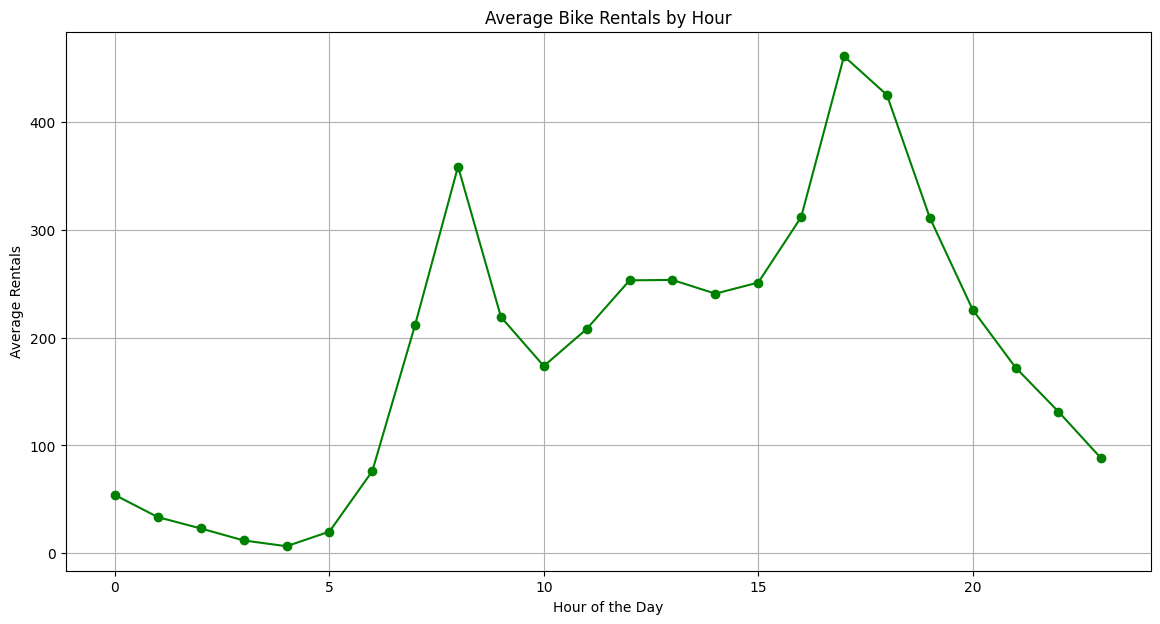

In [11]:
# Hourly Rental Patterns
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(14, 7))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', color='green')

# Setting labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Hour')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


- The plot depicts the fluctuation in average number of bike rentals throughout a day. Bike rentals are lowest in the early morning hours, peak during the afternoon rush hour (around 5 PM), and then gradually decline into the night.  The highest average rentals occur around 5 PM, while the lowest occur in the early morning hours.

##### 3.2. How does the total bike rental count vary over time?

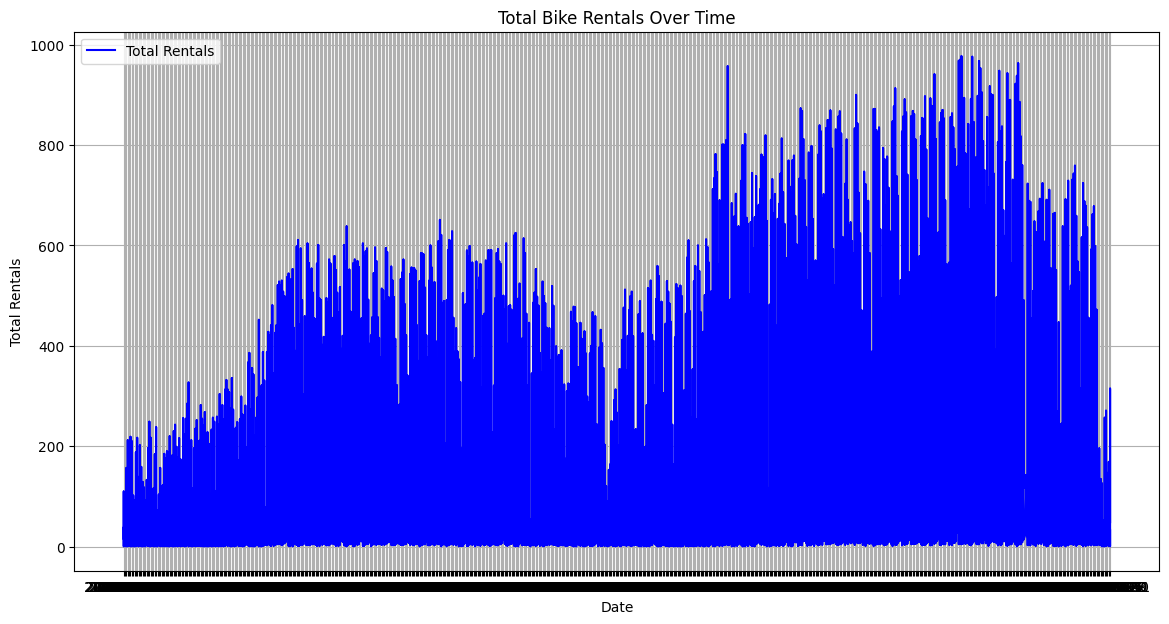

In [12]:
# Rental Counts Over Time
plt.figure(figsize=(14, 7))
plt.plot(hour_df['dteday'], hour_df['cnt'], label='Total Rentals', color='blue')

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals Over Time')

# Adding gridlines for better readability
plt.grid(True)
plt.legend()

# Displaying the plot
plt.show()

- The plot seems to show the total number of bike rentals over time. Bike rentals vary significantly day-to-day, with some days showing very high rental counts while others are much lower. There appears to be a period of increased rentals towards the end of the timeframe shown.

##### 3.3. What are the average bike rental trends across different seasons?

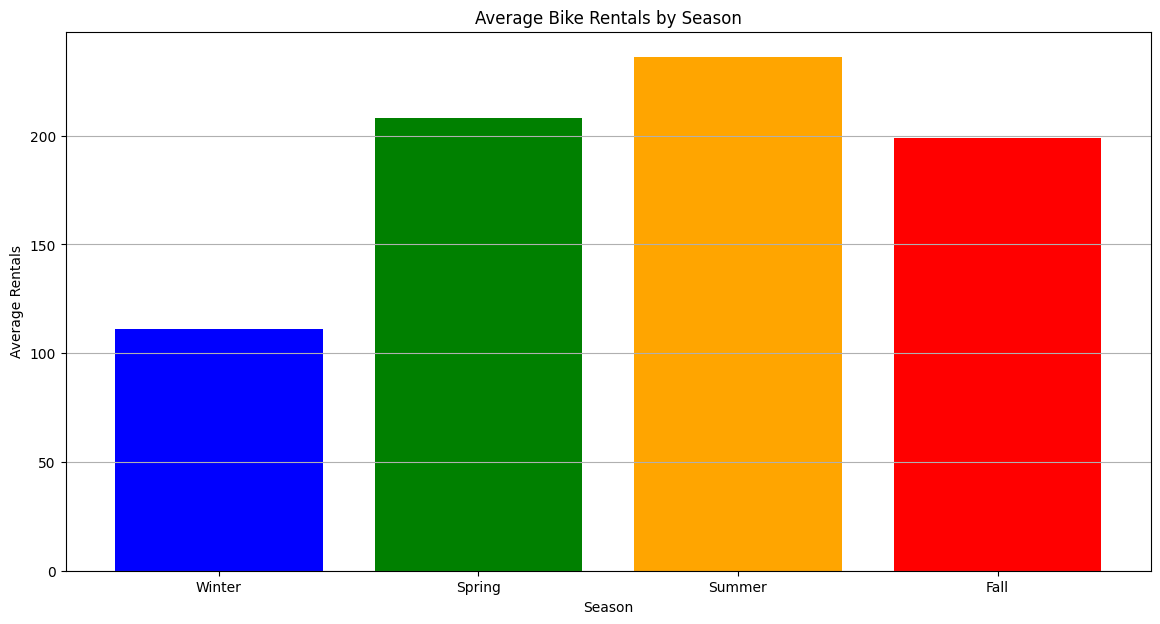

In [13]:
# Seasonal Rental Patterns
seasonal_rentals = hour_df.groupby('season')['cnt'].mean()
season_labels = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(14, 7))
plt.bar(season_labels, seasonal_rentals.values, color=['blue', 'green', 'orange', 'red'])

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Season')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


- The bar chart displays average bike rentals across four seasons. Bike rentals are lowest in winter, increase in spring, peak in summer, and then decrease again in fall. Summer is the most popular season for bike rentals, while winter is the least popular.

##### 3.4. What do the histograms reveal about the distributions of numerical features in the dataset?

<Figure size 1400x700 with 0 Axes>

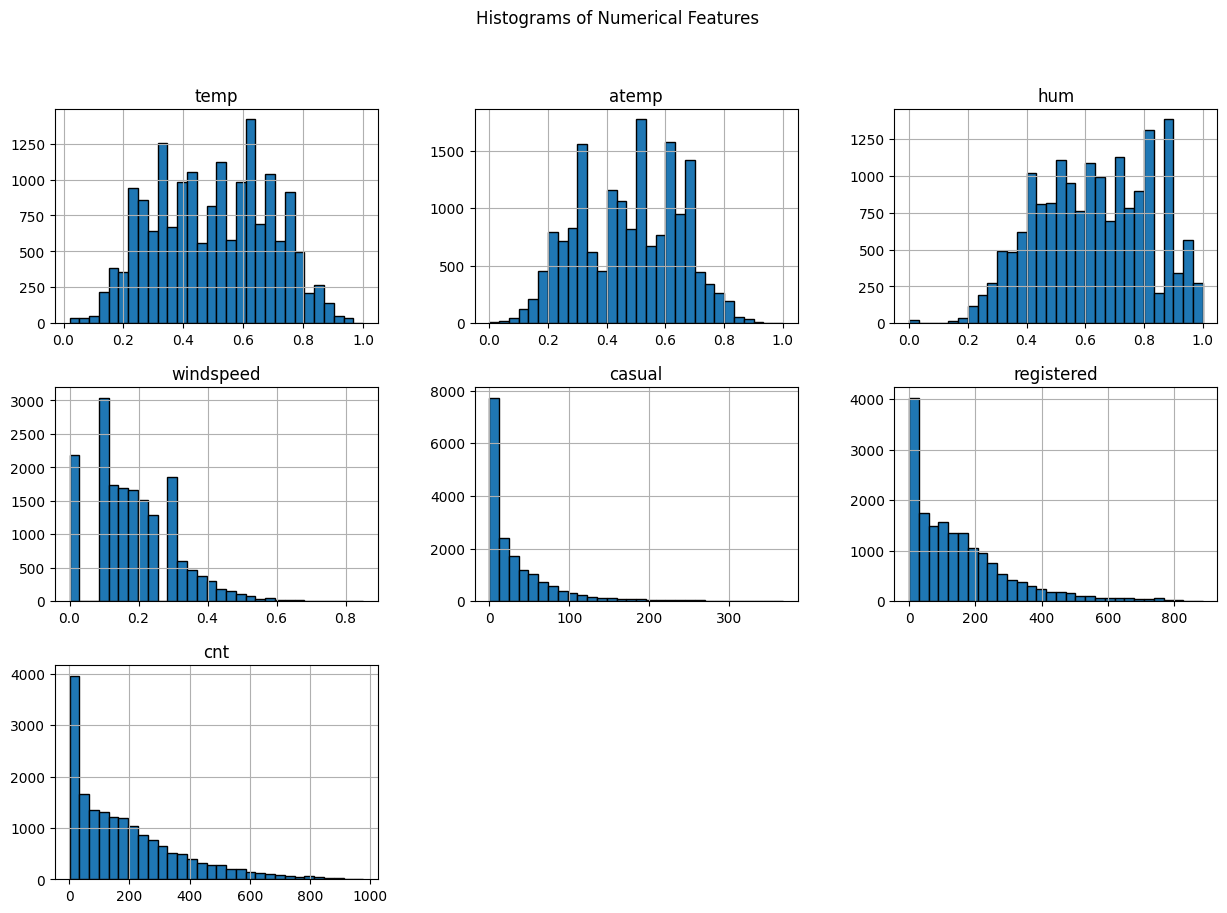

In [14]:
# Histograms
plt.figure(figsize=(14, 7))
hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].hist(bins=30, figsize=(15, 10), edgecolor='black')

# Setting the main title for all plots
plt.suptitle('Histograms of Numerical Features')

# Displaying the plots
plt.show()


- ***temp***: Shows the distribution of actual temperature, primarily concentrated between 0.4 and 0.8 (likely indicating normalized temperature values).
- ***atemp***: Displays the distribution of "feels like" temperature, which closely mirrors the distribution of actual temperature.
- ***hum***: Depicts the distribution of humidity, mainly clustered between 0.5 and 0.8, suggesting moderately high humidity levels are common.
- ***windspeed***: Illustrates the distribution of wind speed, with most values falling between 0 and 0.4 (likely normalized). Few instances of very high wind speeds are observed.
- ***casual***: Shows the distribution of casual bike rentals, mostly occurring in lower numbers with a few instances of higher rentals.
- ***registered***: Depicts the distribution of registered bike rentals, which are generally higher and more frequent than casual rentals.
- ***cnt***: Represents the distribution of total bike rentals (casual + registered), revealing that most rentals fall within a lower to moderate range.

##### 3.5. How do bike rentals vary based on season, weather situation, weekday, and working day?







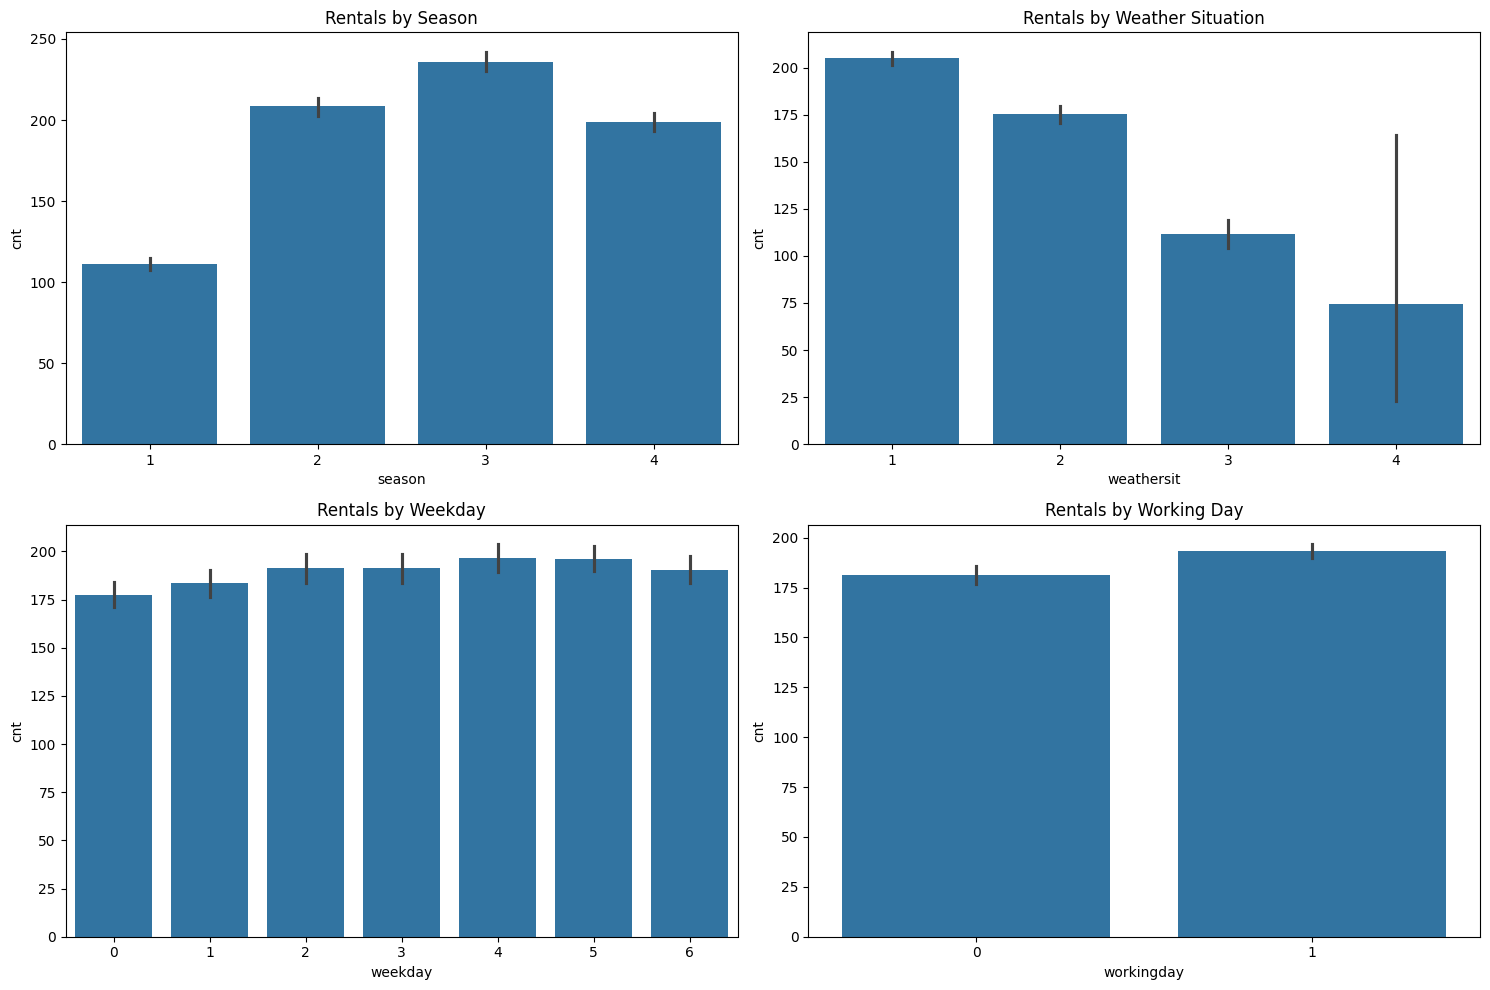

In [15]:
# Box Plots
plt.figure(figsize=(15, 10))

# Rentals by Season
plt.subplot(2, 2, 1)
sns.barplot(x='season', y='cnt', data=hour_df)
plt.title('Rentals by Season')

# Rentals by Weather Situation
plt.subplot(2, 2, 2)
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Rentals by Weather Situation')

# Rentals by Weekday
plt.subplot(2, 2, 3)
sns.barplot(x='weekday', y='cnt', data=hour_df)
plt.title('Rentals by Weekday')

# Rentals by Working Day
plt.subplot(2, 2, 4)
sns.barplot(x='workingday', y='cnt', data=hour_df)
plt.title('Rentals by Working Day')

# Adjust layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


- ***Rentals by Season***: Bike rentals are highest in summer (season 3) and lowest in winter (season 1). There is a clear seasonal pattern with rentals increasing from spring to summer and then decreasing again towards winter.

- ***Rentals by Weather Situation***: Bike rentals are highest during weather situation 1 (likely clear weather) and lowest during weather situation 4 (likely harsher weather). This indicates weather significantly impacts bike rental demand.

- ***Rentals by Weekday***: Bike rentals show a relatively consistent pattern throughout the weekdays, with a slight dip on weekends (days 0 and 6). This suggests weekday rentals are slightly higher than weekend rentals.

- ***Rentals by Working Day***: Bike rentals are notably higher on working days (1) compared to non-working days (0), indicating that bike usage is influenced by work commutes or weekday activities.

##### 3.6. What is the combined effect of season and weather situation on the average bike rental counts?







<Figure size 1400x700 with 0 Axes>

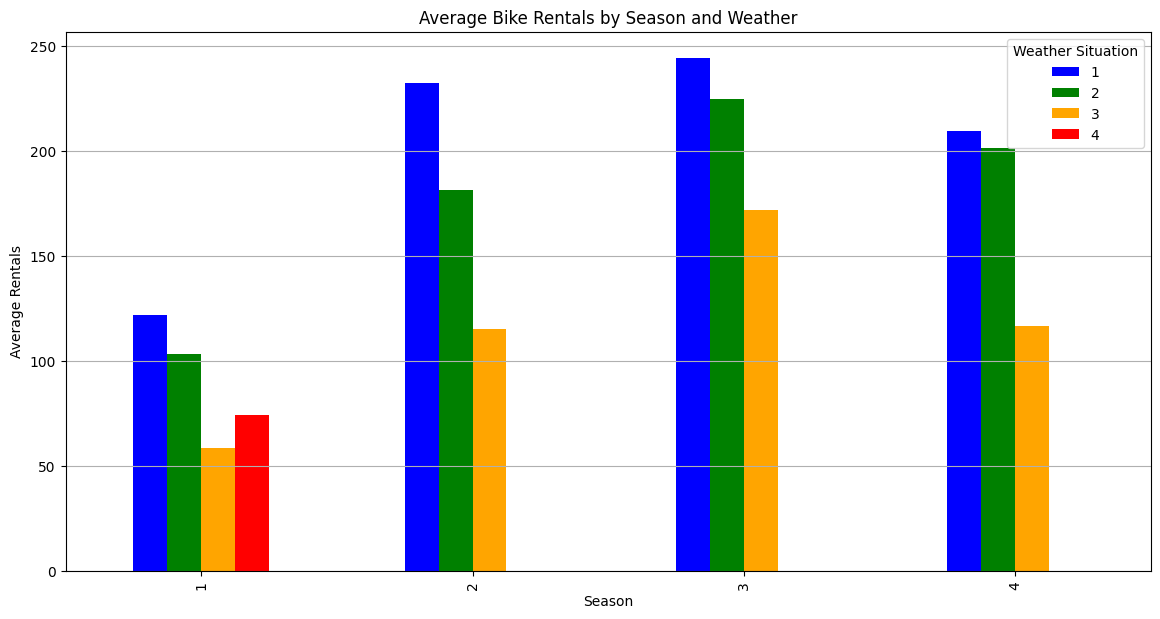

In [16]:
# Rental Counts by Season and Weather
season_weather_rentals = hour_df.groupby(['season', 'weathersit'])['cnt'].mean().unstack()

plt.figure(figsize=(14, 7))
season_weather_rentals.plot(kind='bar', figsize=(14, 7), color=['blue', 'green', 'orange', 'red'])

# Setting labels and title
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Season and Weather')
plt.legend(title='Weather Situation')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


- The bar chart Shows that the average bike rentals across four seasons and four weather situations. Bike rentals peak in summer (season 3) with clear weather (weather situation 1) and are lowest in winter (season 1) with poor weather (weather situation 4), demonstrating a combined influence of season and weather on rental demand.

##### 3.7. How do bike rental counts vary by weekday and working day status?







<Figure size 1400x700 with 0 Axes>

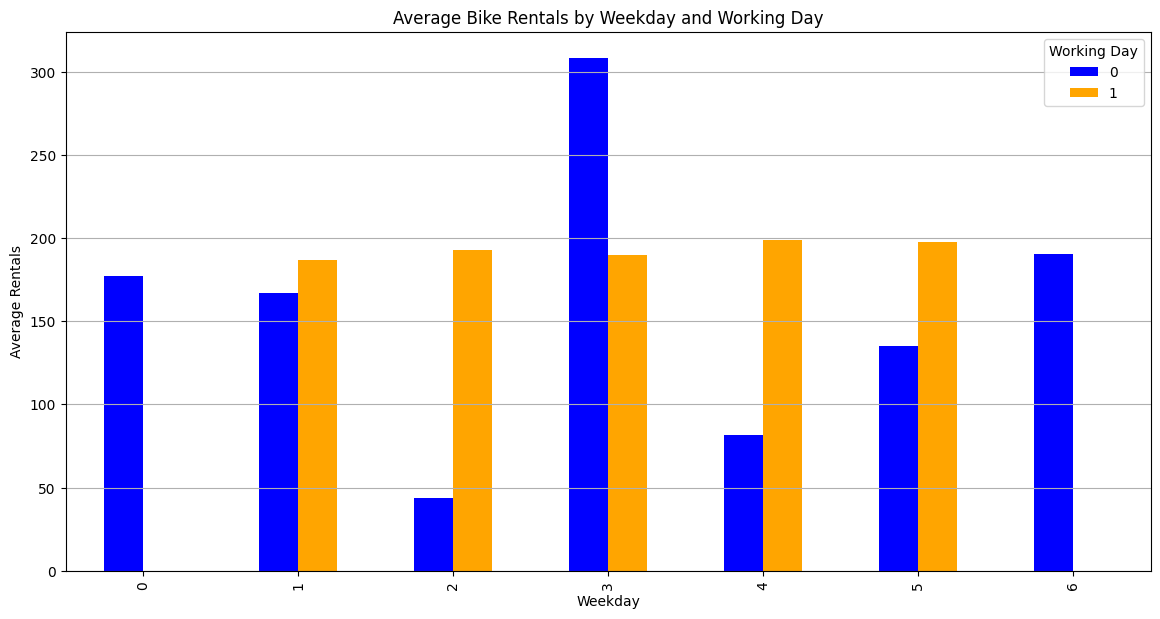

In [17]:
# Rental Counts by Weekday and Working Day
weekday_workingday_rentals = hour_df.groupby(['weekday', 'workingday'])['cnt'].mean().unstack()

plt.figure(figsize=(14, 7))
weekday_workingday_rentals.plot(kind='bar', figsize=(14, 7), color=['blue', 'orange'])

# Setting labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Weekday and Working Day')
plt.legend(title='Working Day')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


- The bar chart compares average bike rentals on weekdays versus weekends (0 and 6) and working days versus non-working days. Bike rentals are consistently higher on working days across the week, with a notable spike on Thursday, while weekend rentals are lower but show a small increase on Sunday compared to Saturday.

##### 3.8. How do total bike rentals vary across different temperature ranges?







C:\Users\carrefour\AppData\Local\Temp\ipykernel_18164\3886492827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_range', y='cnt', data=hour_df, palette='Purples')


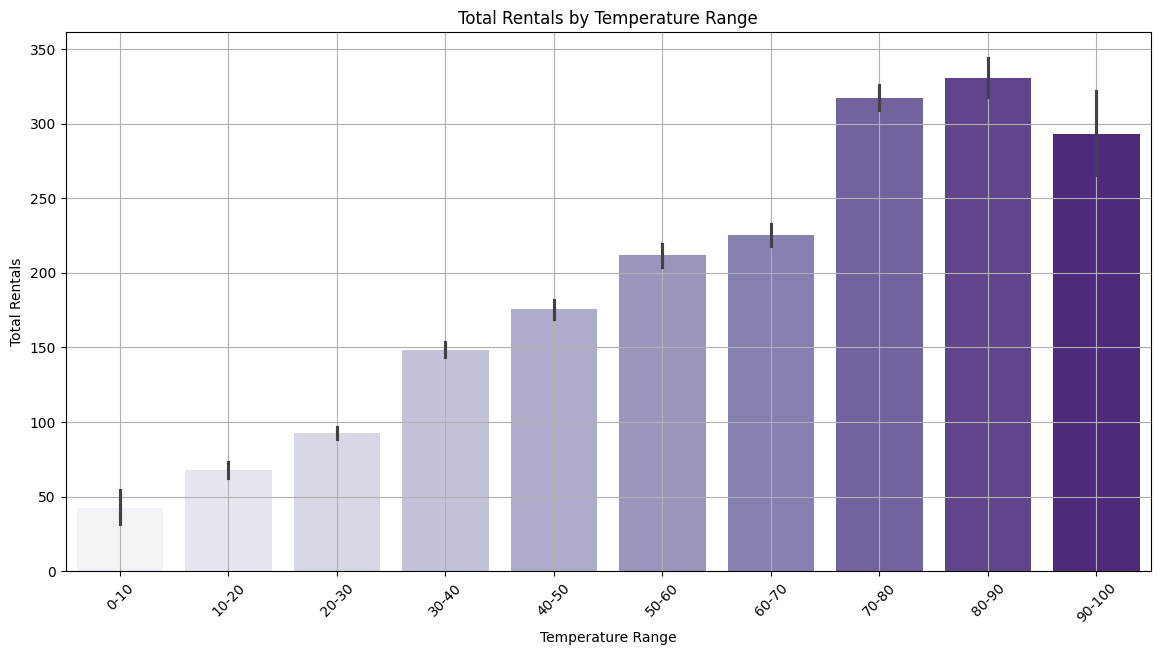

In [18]:
# Create a new column for temperature ranges
hour_df['temp_range'] = pd.cut(hour_df['temp'], bins=10, labels=[f'{i*10}-{(i+1)*10}' for i in range(10)])

# Box Plot of Rentals by Temperature Range
plt.figure(figsize=(14, 7))
sns.barplot(x='temp_range', y='cnt', data=hour_df, palette='Purples')

# Setting labels and title
plt.xlabel('Temperature Range')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Temperature Range')

# Adding gridlines for better readability
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


- The bar chart shows total bike rentals increase as temperature rises, peaking in the 80-90 degree range. However, rentals slightly decrease in the highest temperature range (90-100 degrees), suggesting extreme heat may deter some riders.

##### 3.9. What is the relationship between humidity levels and average bike rentals?

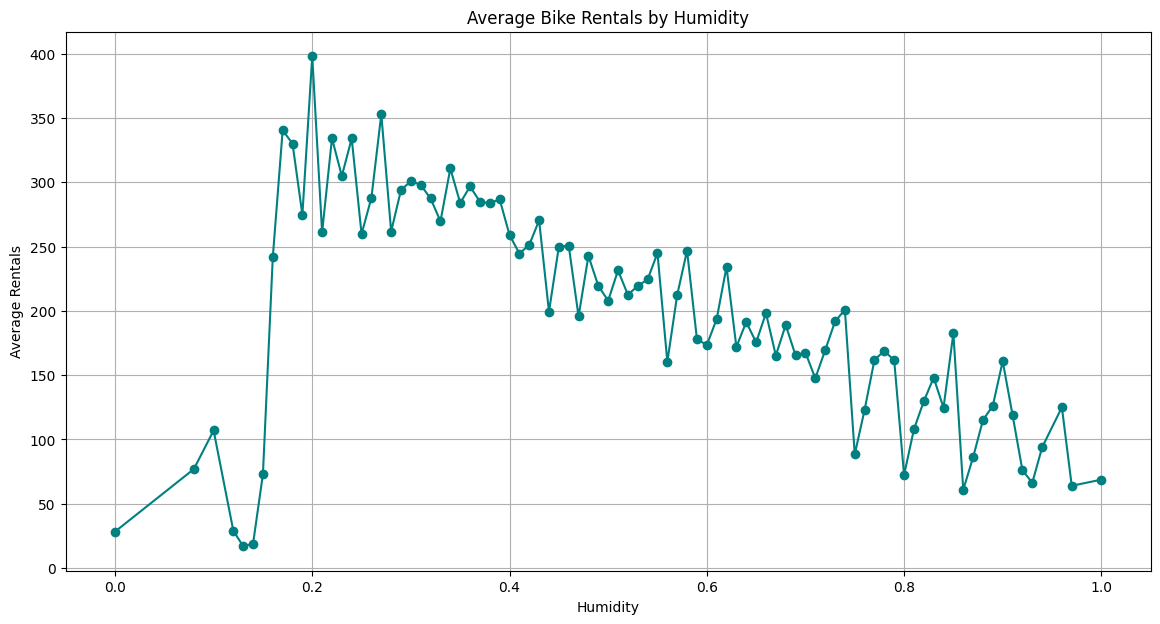

In [19]:
# Grouping the data by 'hum' and calculating the average rentals
humidity_rentals = hour_df.groupby('hum')['cnt'].mean()

plt.figure(figsize=(14, 7))
plt.plot(humidity_rentals.index, humidity_rentals.values, marker='o', color='teal')

# Setting labels and title
plt.xlabel('Humidity')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Humidity')

# Adding gridlines for better readability
plt.grid(True)

# Displaying the plot
plt.show()


- The plot shows that average bike rentals generally decrease as humidity increases. There is a notable exception with a spike in rentals around 0.15 humidity, followed by a sharp decline.

##### 3.10. How does windspeed affect the average number of bike rentals?

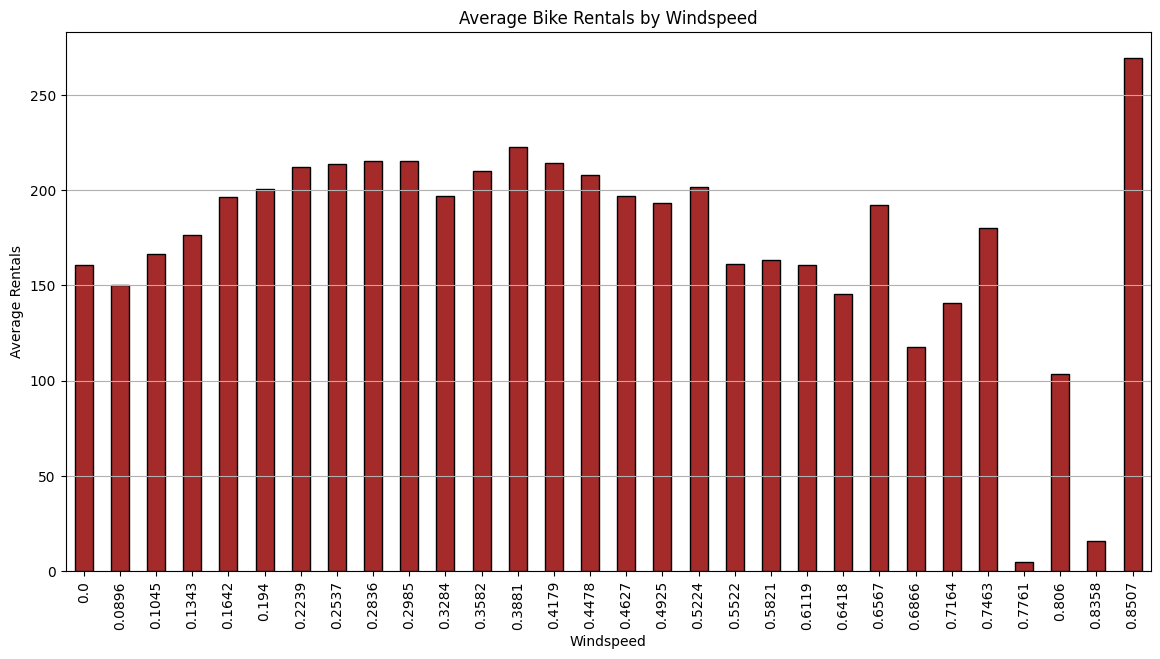

In [20]:
# Grouping the data by 'windspeed' and calculating the average rentals
windspeed_rentals = hour_df.groupby('windspeed')['cnt'].mean()

plt.figure(figsize=(14, 7))
windspeed_rentals.plot(kind='bar', color='brown', edgecolor='black')

# Setting labels and title
plt.xlabel('Windspeed')
plt.ylabel('Average Rentals')
plt.title('Average Bike Rentals by Windspeed')

# Adding gridlines for better readability
plt.grid(True, axis='y')

# Displaying the plot
plt.show()


- The plot indicates that average bike rentals generally remain consistent across a wide range of wind speeds, with a slight dip around mid-range wind speeds. However, there's a sharp drop in rentals at the highest wind speed, and a significant spike at the second-highest wind speed

#### Module 4: Data Preprocessing.

- Data preprocessing is the initial step in preparing data for analysis or machine learning, involving tasks such as cleaning up data, handling missing values, scaling numerical features, and converting categorical variables into a format that algorithms can process effectively. It aims to ensure the data is reliable and ready for accurate modeling or analysis.

In [21]:
# Separate features and target variable
X = hour_df.drop(['cnt'], axis=1)
y = hour_df['cnt']

# Identify categorical columns
cat_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

# Pipeline for preprocessing
numeric_transformer = StandardScaler()

# Column transformer for both numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

- This code prepares the data for machine learning by standardizing numeric features and converting categorical features into a format suitable for algorithms. It then divides the dataset into two parts: one for training the model (80% of the data) and another for testing its performance (20% of the data), ensuring the results are reproducible with a fixed random seed.

#### Module 5: Model Training and Model Evaluation.

 - Model Training is the process of teaching a machine learning algorithm using data, allowing it to learn and understand patterns. Model Evaluation is how we measure how well the algorithm performs, using metrics to see how accurately it predicts outcomes on new data.

##### 5.1. Linear Regression

In [22]:
# Initializing the model
model_lr = LinearRegression()

# Fitting the model
model_lr.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluation
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Report")
print(f'RMSE: {rmse_lr}')
print(f'R² Score: {r2_lr}')


Linear Regression Report
RMSE: 0.000980989085468543
R² Score: 0.9999999999696091


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- This code sets up a Linear Regression model, trains it with scaled training data, predicts bike rental counts using test data, and evaluates its performance with metrics like Root Mean Squared Error (RMSE) and R² Score to assess accuracy and how well it fits the data.

##### 5.2. Decision Tree Regressor

In [23]:
# Initializing the model
model_dt = DecisionTreeRegressor(random_state=42)

# Fitting the model
model_dt.fit(X_train_scaled, y_train)

# Making predictions
y_pred_dt = model_dt.predict(X_test_scaled)

# Evaluation
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor Report")
print(f'RMSE: {rmse_dt}')
print(f'R² Score: {r2_dt}')


Decision Tree Regressor Report
RMSE: 5.6122554126688735
R² Score: 0.9990053054898811


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- This code sets up a Decision Tree Regression model, trains it on scaled training data, predicts bike rental counts using test data, and then evaluates its performance using metrics like Root Mean Squared Error (RMSE) and R² Score to understand how well the model predicts rental counts.

##### 5.3. Random Forest Regressor

In [24]:
# Initializing the model
model_rf = RandomForestRegressor(random_state=42)

# Fitting the model
model_rf.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluation
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor Report")
print(f'RMSE: {rmse_rf}')
print(f'R² Score: {r2_rf}')


Random Forest Regressor Report
RMSE: 2.79179077179214
R² Score: 0.9997538609042325


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- This code initializes a Random Forest Regression model with a consistent random seed, trains it on scaled training data to predict bike rental counts using test data, and evaluates its performance using metrics like RMSE (Root Mean Squared Error) and R² Score to gauge predictive accuracy.

##### 5.4. Gradient Boosting Regressor 

In [25]:
# Initializing the model
model_gb = GradientBoostingRegressor(random_state=42)

# Fitting the model
model_gb.fit(X_train_scaled, y_train)

# Making predictions
y_pred_gb = model_gb.predict(X_test_scaled)

# Evaluation
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor Report")
print(f'RMSE: {rmse_gb}')
print(f'R² Score: {r2_gb}')


Gradient Boosting Regressor Report
RMSE: 5.352407165407821
R² Score: 0.9990952821626123


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- This code initializes a Gradient Boosting Regression model with a consistent random seed, trains it on scaled training data to predict bike rental counts using test data, and evaluates its performance using metrics like RMSE and R² Score to assess the accuracy of rental count predictions.

##### 5.5. Support Vector Regressor

In [26]:
# Initializing the model
model_svr = make_pipeline(StandardScaler(with_mean=False), SVR())

# Fitting the model
model_svr.fit(X_train_scaled, y_train)

# Making predictions
y_pred_svr = model_svr.predict(X_test_scaled)

# Evaluation
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor Report")
print(f'RMSE: {rmse_svr}')
print(f'R² Score: {r2_svr}')


Support Vector Regressor Report
RMSE: 172.41576079676503
R² Score: 0.06120927167928314


c:\Users\carrefour\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- This code sets up a Support Vector Regressor model that scales the data, trains it on the training set to predict bike rental counts using the test data, and evaluates how well it predicts rentals using metrics like RMSE and R² Score.

##### Model Performance Summary Table


| Model                     | RMSE       | R² Score   |
|---------------------------|------------|------------|
| **Linear Regression**     | 0.00098    | 0.999999   |
| **Decision Tree Regressor** | 5.61       | 0.999      |
| **Random Forest Regressor** | 2.79       | 0.99975    |
| **Gradient Boosting Regressor** | 5.35       | 0.9991     |
| **Support Vector Regressor (SVR)** | 172.42     | 0.0612     |

### Recommendation for Production:

Based on the analysis, **Random Forest Regressor** is recommended for production due to its balanced performance metrics and ability to handle complex relationships effectively while reducing overfitting compared to other models.



##### Data Challenges
- Data Quality and Completeness: Ensuring both hourly and daily datasets were clean and complete, with no missing values.
- Feature Engineering: Creating meaningful features like temperature ranges and aggregating hourly data to daily.
- Data Type Handling: Converting non-numeric data types (e.g., dates) and handling categorical variables.


##### Techniques Used
- Exploratory Data Analysis (EDA): Utilized histograms, box plots, and line plots to understand data distributions, trends, and relationships.
- Machine Learning Models: Employed Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and Support Vector Regression (SVR) for predictive modeling.
- Pipeline and Preprocessing: Standardized numeric data and one-hot encoded categorical features using Scikit-Learn's pipeline and column transformer.

#### Conclusion 
- The analysis of bike rental data reveals strong seasonal and weather patterns. Bike rentals peak in summer with clear weather and are lowest in winter with poor weather. Workdays see significantly higher rentals than non-working days. Temperature positively affects rentals, but extreme heat can deter riders. Humidity generally decreases rentals, except at low levels. Wind speed has minimal impact, except in extreme cases. The Random Forest model is the most accurate predictor of rental demand, making it a valuable tool for optimizing bike-sharing systems.

<div align="center">

---
</div>

<h1 align="center">Thank You</h1>

<div align="center">

</div>